# Loading CT data

These are the recordings, one per ear and each with a "parsed" file of concentrations* and a file for distances between the measured locations (ROIs).

\* We measure CT or MR signal, which we'll assume is proportional to concentrations and therefore as good as concentrations for our purposes.

Below, I first make a table of the CT scans, and then load a particular scan.

In [22]:
import pandas as pd
import numpy as np
from os import listdir, path

import matplotlib.pyplot as plt

import sys
sys.path.append(path.abspath("./src/"))
from parsingCTandMR import *
import parse_raw_ct as prc
import imp
imp.reload(prc)

<module 'parse_raw_ct' from '/Users/lgn148/Documents/GitHub/Collab-BrainEfflux/code/src/parse_raw_ct.py'>

In [23]:
!ls ../../data/raw/CT/

20210120_M3_L.csv               20210120_m2_R.csv
20210120_M3_R.csv               CT positions and overview.xlsx
20210120_M4_L.csv               Positions_CA1toroundwindow.xlsx
20210120_M4_R.csv               Positions_ca1_st.xlsx
20210120_M6_L.csv               S. Table 2 data.xlsx
20210120_M6_R.csv               ca1pixel
20210120_m1_L.csv               m1_r_ca1toroundwindow.csv
20210120_m1_R.csv               m1_r_ca1tost.csv
20210120_m2_L.csv


In [34]:
datadir = "../../data/raw/CT/"
filename = "20210120_m2_R.csv"
locfile = "CT positions and overview.xlsx"
savedir = "../../data/parsed/CT/"
signaldf, voldict = prc.parse_csv(datadir, filename)
signaldf.to_csv(savedir + filename.replace('.', '_parsed.').lower())

In [32]:
prc.parse_distances(datadir + locfile, savedir)

In [33]:
signaldf

Label Name,CA1,CA2,CA3,CA4,CA5,ST1,SV1,ST2,SV2,ST3,...,SM4 std,SM5 std,SM6 std,SM7 std,SM8 std,CN1 std,CN2 std,CM1 std,CM2 std,time
1,3528.22,2159.21,1496.09,1379.54,884.316,136.591,464.138,613.640,546.576,570.616,...,318.290,226.487,314.123,332.042,336.111,289.844,329.230,491.174,666.813,1
2,7530.26,5567.23,4449.15,3333.02,1892.060,690.982,488.559,493.741,541.989,543.263,...,260.849,412.522,234.065,250.241,283.905,228.994,430.111,1630.230,729.036,2
3,5469.29,4293.78,3436.52,3061.66,1986.640,600.261,331.539,878.413,312.554,751.250,...,274.436,254.008,264.842,196.927,328.428,383.532,362.466,903.847,610.687,3
4,2225.76,1599.68,1361.15,1306.62,1116.550,1092.860,351.841,614.022,436.700,1051.020,...,264.456,336.969,245.024,297.321,309.731,344.640,405.426,325.810,480.159,4
5,1800.61,1365.66,1377.29,1480.37,1281.140,817.889,463.968,749.424,470.126,916.723,...,303.539,374.940,192.320,206.326,229.754,221.005,378.599,327.396,545.330,5
6,1547.01,1211.99,1141.53,1319.49,1151.040,811.349,118.795,637.000,299.175,470.508,...,363.609,275.471,369.049,294.257,295.844,280.649,222.485,299.566,389.268,6


KeyError: 'Label 6'

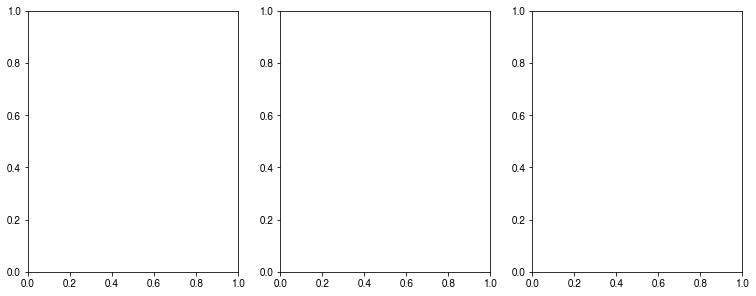

In [30]:
concentrations = signaldf
time = signaldf.time

fig, axes = plt.subplots(ncols=3, figsize=[12.8, 4.8])

ax = axes[0]
for i in range(6, 16):
    namestring = f'Label {i}'
    ax.plot(time, concentrations.loc[:, namestring], label=namestring)

ax.set_xlabel("time")
ax.set_ylabel("CT signal")
    
ax = axes[1]
for i in range(15, 20):
    namestring = f'Label {i}'
    ax.plot(time, concentrations.loc[:, namestring], label=namestring)

#ax.plot(time, concentrations.loc[:, "Label 7"], label="Label 7")
#ax.plot(time, concentrations.loc[:, "Label 10"], label="Label 10")
ax.set_xlabel("time")
ax.set_ylabel("CT signal")
#ax.legend()

ax = axes[2]
for timeindex in [1, 2, 3, 4, 5]:
    ax.plot(concentrations.iloc[timeindex, :20].values, label=f"t = {time[timeindex]}")

ax.set_xlabel("distances")
ax.set_ylabel("CT signal")
ax.legend()

plt.subplots_adjust(wspace=0.5)
plt.show()